<a href="https://colab.research.google.com/github/PrathameshBagal/Data-Science/blob/main/cse519_hw2_Bagal_Prathamesh_115612879.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Copy this notebook (if using Colab) via `File -> Save a Copy in Drive`.

## You can do this assignment outside of Colab (using your local Python installation) via `File -> Download`.

## <u>**Use the "Text" blocks to provide explanations wherever you find them necessary. Highlight your answers inside these text fields to ensure that we don't miss it while grading your HW.**</u>

## **Setup**

- Code to download the data directly from the colab notebook.
- If you find it easier to download the data from the kaggle website (and uploading it to your drive), you can skip this section.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# First mount your drive before running these cells.
# Create a folder for the this HW and change to that dir
%cd drive/MyDrive/cse519

/content/drive/MyDrive/cse519


# Download data from Kaggle

In [6]:
!pip install -q kaggle

In [7]:
from google.colab import files
# Create a new API token under "Account" in the kaggle webpage and download the json file
# Upload the file by clicking on the browse
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"prathameshbagal2908","key":"7c39bd28bf8ec01c18c560e841a8e860"}'}

In [8]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
!kaggle competitions download -c commonlit-evaluate-student-summaries

commonlit-evaluate-student-summaries.zip: Skipping, found more recently modified local copy (use --force to force download)


# Alternate: download data using gdown (if having issues with Kaggle)

In [11]:
!pip install gdown

In [12]:
import gdown
url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
gdown.download(url)

Downloading...
From: https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM
To: /content/drive/MyDrive/cse519/commonlit-evaluate-student-summaries.zip
100%|██████████| 1.10M/1.10M [00:00<00:00, 70.1MB/s]


'commonlit-evaluate-student-summaries.zip'

# Extract data and install packages (regardless of data acquisition method)

In [13]:
!unzip commonlit-evaluate-student-summaries.zip

Archive:  commonlit-evaluate-student-summaries.zip
replace prompts_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [14]:
### TODO: Install required packages
### Student's code here
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
### END

## **Section 1: Library and Data Imports (Q1, 5 points)**

- Import your libraries and join the data from both `summaries_train.csv` and `prompts_train.csv` into a single dataframe with the same structure as `use_cols`. Print the head of the dataframe. **Do not modify `use_cols`.**

In [15]:
use_cols = ["student_id",
            "prompt_id",
            "text",
            "content",
            "wording",
            "prompt_question",
            "prompt_title",
            "prompt_text"
           ]
dtypes = {
        'student_id':                                    'string',
        'prompt_id':                                     'string',
        'text':                                          'string',
        'content':                                       'Float64',
        'wording':                                       'Float64',
        'prompt_question':                               'string',
        'prompt_title':                                  'string',
        'prompt_text':                                   'string',
        }

In [16]:
### TODO: Load required packages
### Student's code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
###

# Reading both the csv files and storing them temporarily
prompts_train = pd.read_csv("prompts_train.csv")
summaries_train= pd.read_csv("summaries_train.csv")

#  Merging both of them on prompt_id to make df structure as that of use_cols


In [17]:
prompts_train

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


In [18]:
summaries_train

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757
...,...,...,...,...,...
7160,ff7c7e70df07,ebad26,They used all sorts of chemical concoctions to...,0.205683,0.380538
7161,ffc34d056498,3b9047,The lowest classes are slaves and farmers slav...,-0.308448,0.048171
7162,ffd1576d2e1b,3b9047,they sorta made people start workin...,-1.408180,-0.493603
7163,ffe4a98093b2,39c16e,An ideal tragety has three elements that make ...,-0.393310,0.627128


In [19]:
df = summaries_train.merge(prompts_train,on="prompt_id")
df.head(10)

,student_id,prompt_id,text,content,wording,prompt_question,prompt_title,prompt_text
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
1,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
2,0095993991fe,814d6b,The third wave only started as an experiment w...,0.205683,0.380538,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,00c20c6ddd23,814d6b,The experimen was orginally about how even whe...,0.567975,0.969062,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
4,00d40ad10dc9,814d6b,The third wave developed so quickly due to the...,-0.910596,-0.081769,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
5,014e2395b3c4,814d6b,The Thrid Wave movement in the school has more...,1.376083,2.389443,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
6,01d303ea2f62,814d6b,The Third Wave developed and spead over such a...,0.735204,2.346576,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
7,026adb5ec602,814d6b,The thrid wave is a sumbol of strengtht and is...,-1.065590,-0.202142,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
8,03a1a8864b4b,814d6b,the class began to take the Third Wave to seri...,-1.264214,-1.505073,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
9,03a54047d87d,814d6b,Jones thought that his project was getting out...,-0.393310,0.627128,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...


## **Section 2: Features (Q2 and Q3, 25 points total)**

In [20]:
task2Table= pd.DataFrame()
N= len(df)

# for Q 2.1. Total words in "text" and "prompt_text"
totalTextLength=[]
totalPromptLength=[]

# for 2.2.  Distinct words in "prompt_text" and "text"
distinctTextLength=[0 for _ in range(N)]
distinctPromptLength=[ 0 for _ in range(N)]

# for 2.3.  for common words in "text" and "prompt_text"
commTextPromptText=[]

# for 2.4   Common words in"text" and "prompt_question"
commTextPromptQ=[]

# for 2.5 common words in "text" and "prompt_title"
commTextPromptTitle=[]

text=[]
# Common for loop for all the questions
for i in range(N):
# Q 2.1

  # Calculating total words in the "text" column
  totalTextLength.append((len(df.loc[i]["text"].split())))

  # Calculating total words in the "prompt_text" column
  totalPromptLength.append((len(df.loc[i]["prompt_text"].split())))


# Q 2.2
  # Calculating unique words in "text"
  uniqueText=len(set(df.loc[i]["text"].split()))
  distinctTextLength[i]=uniqueText

 # Calculating unique words in "prompt_text"
  uniquePrompt= len(set(df.loc[i]["prompt_text"].split()))
  distinctPromptLength = uniquePrompt



#Q 2.3
  # Calculating common words in "text" and "prompt_text"
  textPromptTextCommon=0

  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_text"].split()):
      textPromptTextCommon+=1
  commTextPromptText.append(textPromptTextCommon)


# Q 2.4
  # Calculating common words in "text" and "prompt_question"
  textPromptQCommon=0

  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_question"].split()):
      textPromptQCommon+=1
  commTextPromptQ.append(textPromptQCommon)



# Q 2.5
# Calculating common words in "text" and "prompt_title"
  textPromptTitleCommon=0
  for word in set(df.loc[i]["text"].split()):
    if word in set(df.loc[i]["prompt_title"].split()):
      textPromptTitleCommon+=1
  commTextPromptTitle.append(textPromptTitleCommon)



task2Table["totalTextLength"]= totalTextLength
task2Table["totalPromptLength"]= totalPromptLength
task2Table["distinctTextLength"]=distinctTextLength
task2Table["distinctPromptLength"]=distinctPromptLength
task2Table["commTextPromptText"]= commTextPromptText
task2Table["commTextPromptQ"]= commTextPromptQ
task2Table["commTextPromptTitle"]= commTextPromptTitle
task2Table.head(10)

,totalTextLength,totalPromptLength,distinctTextLength,distinctPromptLength,commTextPromptText,commTextPromptQ,commTextPromptTitle
0,61,596,51,303,21,5,1
1,203,596,138,303,46,9,3
2,60,596,50,303,29,5,1
3,76,596,59,303,36,7,1
4,27,596,25,303,15,5,1
5,126,596,77,303,40,10,2
6,133,596,89,303,41,15,3
7,39,596,27,303,21,5,1
8,26,596,24,303,14,7,2
9,44,596,34,303,20,6,1



# **Section 2, Question 3, Additional features**




The features

The features I will be adding are the "Flesch Reading ease", the number of difficult words in each summary.

In [21]:
!git clone https://github.com/andrei-papou/textstat.git
!cd textstat; pip install . --target=/kaggle/working/package

fatal: destination path 'textstat' already exists and is not an empty directory.
Processing /content/drive/MyDrive/cse519/textstat
  Preparing metadata (setup.py) ... done
  Created wheel for textstat: filename=textstat-0.7.3-py3-none-any.whl size=105373 sha256=c980734437fef32356efa82f9a58c181df0c66b6660d91104c22445031b869f9
  Stored in directory: /tmp/pip-ephem-wheel-cache-udvyz5di/wheels/2f/be/e2/922fa094cae6c6e6b60ae983c95407addbdcf0a69b014d728d
Successfully built textstat


In [22]:
import sys
sys.path.append("/kaggle/working/package")

methods = ["flesch_reading_ease",
           "dale_chall_readability_score",
           "difficult_words",
           ]


https://www.kaggle.com/code/kononenko/pip-install-textstat-mit

In [23]:
import textstat
textData= df["text"][:N]
fleschReadingEase=[None]*N
daleChallReadabilityScore=[None]*N
difficultWords=[None]*N
i=0
for text in textData:

  for  method in methods:
    res = getattr(textstat, method)(text)

    if method=="flesch_reading_ease":fleschReadingEase[i]=res
    elif method=="dale_chall_readability_score":daleChallReadabilityScore[i]=res
    else:difficultWords[i]=res

  i+=1

In [24]:
additionalFeatures=pd.DataFrame()

additionalFeatures["fleschReadingEase"]= fleschReadingEase
additionalFeatures["daleChallReadabilityScore"]= daleChallReadabilityScore
additionalFeatures["difficultWords"]= difficultWords


In [25]:
# Adding a new column to count the letters in a summary
additionalFeatures["textLetters"]= df["text"].str.len()

In [26]:
#  Finding similarity between the prompt and the summary

similarity=[None]*N

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Create TF-IDF vectors for the original content and summary
tfidf_vectorizer = TfidfVectorizer()

for i in range(N):
  tfidf_matrix = tfidf_vectorizer.fit_transform([df["text"][i], df["prompt_text"][i]])

  # Calculate cosine similarity
  similarity[i] = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

additionalFeatures['similarity']=similarity
additionalFeatures

,fleschReadingEase,daleChallReadabilityScore,difficultWords,textLetters,similarity
0,55.95,7.76,11,346,0.414777
1,56.76,8.24,36,1225,0.714402
2,67.76,8.71,12,345,0.513356
3,45.80,8.84,13,451,0.670896
4,74.69,7.81,5,145,0.450628
...,...,...,...,...,...
7160,46.44,10.54,9,180,0.278090
7161,57.95,9.34,7,163,0.335654
7162,87.01,6.30,3,150,0.317723
7163,46.47,9.92,15,297,0.524103


In [27]:
print(df['wording'].corr(additionalFeatures["textLetters"]),additionalFeatures["textLetters"].corr(df["content"]))
print(additionalFeatures["similarity"].corr(df["wording"]),additionalFeatures["similarity"].corr(df["content"]))
print(additionalFeatures["fleschReadingEase"].corr(df["wording"]),additionalFeatures["fleschReadingEase"].corr(df["content"]))

0.5401383504788467 0.7972435838178858
0.3334530392910856 0.597492400879186
0.03702011810841242 -0.027080782437102057


## **Section 3: Content and Wording (Q4, 10 points)**

In [28]:
evalMetricsDf= pd.DataFrame()
evalMetricsDf["content"] = df["content"]
evalMetricsDf['wording']= df['wording']
evalMetricsDf

,content,wording
0,0.205683,0.380538
1,3.272894,3.219757
2,0.205683,0.380538
3,0.567975,0.969062
4,-0.910596,-0.081769
...,...,...
7160,-0.981265,-1.548900
7161,-0.511077,-1.589115
7162,-0.834946,-0.593749
7163,-0.157460,-0.165811


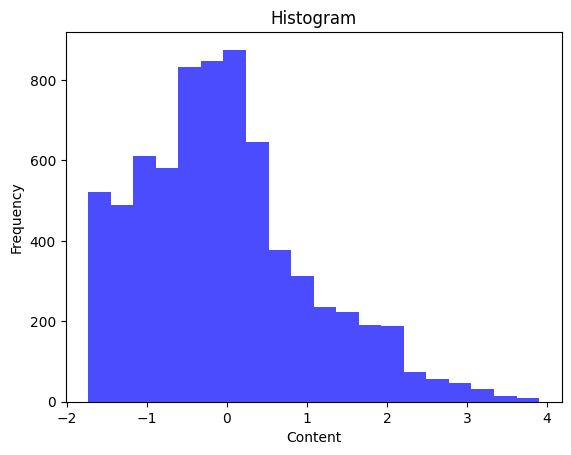

In [29]:
#BEGIN[Matplotlib documentation][https://matplotlib.org/stable/gallery/statistics/hist.html#sphx-glr-gallery-statistics-hist-py]"How to make histograms in Matplotlib"

# Plot histogram
plt.hist(df["content"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Content')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

#END[Matplotlib docmunetation]


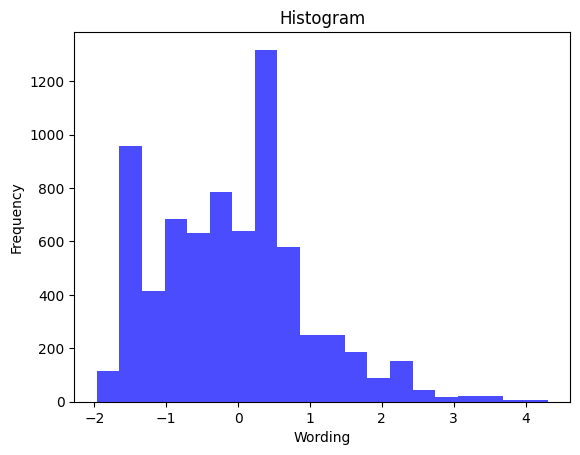

In [30]:
plt.hist(df["wording"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Wording')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

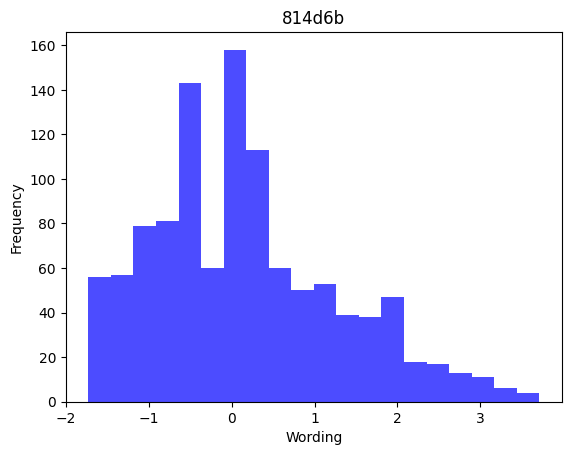

In [37]:
plt.hist(df.loc[df["prompt_id"]=="814d6b"]["content"], bins=20, color='blue', alpha=0.7)
plt.xlabel('Wording')
plt.ylabel('Frequency')
plt.title("814d6b")
plt.show()
# df.loc[df["prompt_id"]=="814d6b"]["content"]

In [ ]:
for prompt in prop

In [38]:
contentMean = df["content"].mean()
contentDeviation = df["content"].std()
print(f"Mean of content is : {contentMean} and the standard deviation is {contentDeviation}")

Mean of content is : -0.014852963999488676 and the standard deviation is 1.0435693830622939


In [39]:
wordingMean = df["wording"].mean()
wordingDeviation = df["wording"].std()
print(f"Mean of wording is : {wordingMean} and the standard deviation is {wordingDeviation}")

Mean of wording is : -0.06307182089297687 and the standard deviation is 1.0360481418751637


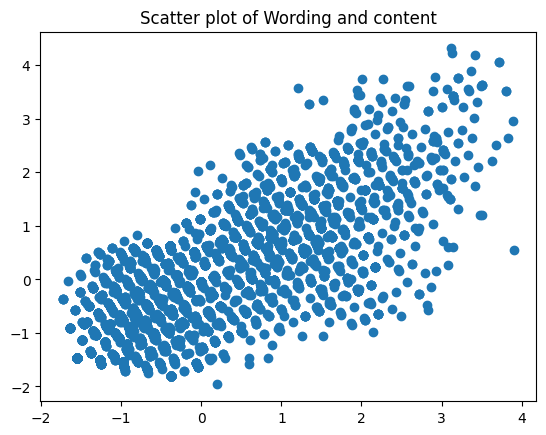

In [40]:
#  Scatter plot between content and wording score
plt.scatter(df["content"], df["wording"])
plt.title("Scatter plot of Wording and content")
plt.show()
# The scatter plot between content and wording score clearly indicates that there is a positive correlation between the two variables

In [41]:
# The corrlation between the content score and the wording score of the summary is 0.75
df["content"].corr(df["wording"])

0.7513804859701969

In [42]:
uniquePromptsId=list(prompts_train["prompt_id"])
(uniquePromptsId)

['39c16e', '3b9047', '814d6b', 'ebad26']

## **Section 4: Words in Good and Bad Essays (Q5, 10 points)**

 I personally feel that most of the summaries would have common words like "a", "the", "and",etc. These words would be the most popular in most summaries regardless of their content or wording score. I have therefore made the decision of removing the stop words before calculating the most common words in good and bad essays.


In [45]:
!pip install nltk

https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):

    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    new_text = " ".join(words)
    return (new_text)


df['cleanedText'] = df['text'].apply(remove_stopwords)
df


Now to find the most common words in good and bad summaries, I will segregate the summaries based on the content and wording score. All summaries with content and wording > their respective mean values are classified as good and all with content and wording < their respective mean values are classifies as bad

In [ ]:
goodSummaries = df.loc[df["content"] > contentMean]

goodSummaries = goodSummaries.loc[goodSummaries["wording"] > wordingMean]
print(len(goodSummaries))
goodSummaries

In [ ]:
badSummaries = df.loc[df["content"] < contentMean]
badSummaries = badSummaries.loc[badSummaries["wording"] < wordingMean]
print(len(badSummaries))
badSummaries

In [109]:

#  Calculating the frequencies of all words in the summaries with content and wording greater than their means
from collections import Counter

#  Punctuation marks to be removed
punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

goodText = ""

for i in range(len(goodSummaries)):
  summary = goodSummaries.iloc[i]["cleanedText"]

  #  Removing punctuation marks
  for ele in summary:
    if ele in punctuation:
      summary = summary.replace(ele,"")

  goodText += ''.join(summary).lower()

goodFreq= Counter(goodText.split())


2982

In [102]:
#  Calculating the frequencies of all words in the summaries with content and wording less than their respective means

badText = ""

for i in range(len(badSummaries)):
  summary = badSummaries.iloc[i]["cleanedText"]

  # Removing punctuation marks
  for ele in summary:
    if ele in punctuation:
      summary = summary.replace(ele,"")

  badText += ''.join(summary).lower()


badFreq= Counter(badText.split())


1572

In [97]:
# Identifying the distinguishing words in good and bad summaries

# If the freq of a word is more in the good summaries than in the bad ones,
# then the word has been added to the good part in the distinguished words and vice versa for the bad ones

distinguishingWords = {
    'good': {word: freq for word, freq in goodFreq.items() if freq > badFreq.get(word, 0)},
    'bad': {word: freq for word, freq in badFreq.items() if freq > goodFreq.get(word, 0)}
}
distinguishingWords.items()


5509

The list of good words we have derived will have a lot of words with very low frequencies. These words would not be able to indicate which words actually have an impact on the score of the summary. To solve this problem, what I have done is that I have calculated the mean and the standard deviation of all the frequencies in the good and bad words dictionary. I have only selected the words with frequency > mean + 2 standard deviations for good and bad words. This would help me indicate the words that occur in good and bad summaries and in the highest amount.

In [ ]:

goodWordMean = sum(list(distinguishingWords["good"].values()))/len(distinguishingWords["good"])
goodFreqStdDev= np.std(list(distinguishingWords["good"].values()))

goodWords= {}

for word,freq in distinguishingWords["good"].items():
  if (freq > goodWordMean + 2*goodFreqStdDev):
    goodWords[word]=freq

(list(goodWords.keys()))

In [ ]:
badWordMean = sum(list(distinguishingWords["bad"].values()))/len(distinguishingWords["bad"])
badWordStdDev= np.std(list(distinguishingWords["bad"].values()))

badWords= {}

for word,freq in distinguishingWords["bad"].items():
  if (freq > badWordMean + 2*badWordStdDev):
    badWords[word]=freq

list(badWords.keys())

## **Section 5: Three Interesting Plots (Q6, 15 points)**

## **Section 6: Baseline Model (Q7, 10 points)**

## **Section 7: Feature Cleaning and Additional Models (Q8 & Q9, 20 points total)**

## **Section 8: Kaggle Submission Screenshots (Q10, 5 points)**

Public Score:

Private Score:

Kaggle profile link:

Screenshot(s):